In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/road-traffic-accidents")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/road-traffic-accidents


In [47]:
!git config --global user.name "Devayani26"
!git config --global user.email "devayanivantepaka26@gmail.com"
!git init
!git add .
!git commit -m "Initial commit from Kaggle"


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /kaggle/working/.git/
[master (root-commit) 3673580] Initial commit from Kaggle
 2 files changed, 12317 insertions(+)
 create mode 100644 cleaned_rta.csv
 create mode 100644 rta_data.db


In [6]:
import os

dataset_path = '/kaggle/input/road-traffic-accidents'
files_in_directory = os.listdir(dataset_path)
print("Files in the dataset directory:", files_in_directory)

Files in the dataset directory: ['RTA Dataset.csv', 'cleaned.csv']


In [7]:
import pandas as pd

file_path="/kaggle/input/road-traffic-accidents/RTA Dataset.csv"

df=pd.read_csv(file_path)

#print(df.head())
#print(df.isnull().sum())
print(df)

           Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior h

In [8]:
print(df.isnull().sum())

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [17]:
df.columns = df.columns.str.strip()

In [18]:
print(df.columns.tolist())


['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [24]:
fill_mode_cols = [
    'Educational_level',
    'Vehicle_driver_relation',
    'Driving_experience',
    'Type_of_vehicle',
    'Owner_of_vehicle',
    'Area_accident_occured',
    'Lanes_or_Medians',
    'Road_allignment',
    'Types_of_Junction',
    'Road_surface_type',
    'Type_of_collision',
    'Vehicle_movement',
    'Work_of_casuality',
    'Fitness_of_casuality'
]

for col in fill_mode_cols:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)


In [30]:
import sqlite3
import pandas as pd

# Create a database connection (this will create the database if it doesn't exist)
conn = sqlite3.connect('rta_data.db')

# Check if connection is successful
print("Database connected!")


Database connected!


In [31]:
# Assuming 'df' is the transformed dataframe you want to load
df.to_sql('road_traffic_accidents', conn, if_exists='replace', index=False)

# Confirm the data is saved
print("Data loaded into SQLite!")


Data loaded into SQLite!


In [33]:
# Query the database (example: count accidents by day of the week)
query = "SELECT Day_of_week, COUNT(*) FROM road_traffic_accidents GROUP BY Day_of_week"
result = pd.read_sql(query, conn)

# Display the result
print(result)


  Day_of_week  COUNT(*)
0      Friday      2041
1      Monday      1681
2    Saturday      1666
3      Sunday      1467
4    Thursday      1851
5     Tuesday      1770
6   Wednesday      1840


In [35]:
query="SELECT Day_of_week, COUNT(*) AS accident_count FROM road_traffic_accidents GROUP BY Day_of_week ORDER BY accident_count DESC"
result1=pd.read_sql(query,conn)
print(result1)

  Day_of_week  accident_count
0      Friday            2041
1    Thursday            1851
2   Wednesday            1840
3     Tuesday            1770
4      Monday            1681
5    Saturday            1666
6      Sunday            1467


In [36]:
query="SELECT Type_of_vehicle, COUNT(*) AS accident_count FROM road_traffic_accidents GROUP BY Type_of_vehicle"
result2=pd.read_sql(query,conn)
print(result2)

         Type_of_vehicle  accident_count
0             Automobile            4155
1                  Bajaj              29
2                Bicycle              21
3             Long lorry             383
4         Lorry (11?40Q)             541
5        Lorry (41?100Q)            2186
6             Motorcycle             177
7                  Other            1208
8       Pick up upto 10Q             811
9      Public (12 seats)             711
10  Public (13?45 seats)             532
11   Public (> 45 seats)             404
12          Ridden horse              76
13       Special vehicle              84
14          Stationwagen             687
15                  Taxi             265
16                 Turbo              46


In [39]:
query="SELECT Cause_of_accident,COUNT(*) as accidents_count FROM road_traffic_accidents GROUP BY Cause_of_accident ORDER BY accidents_count DESC"
result3=pd.read_sql(query,conn)
print(result3)

                       Cause_of_accident  accidents_count
0                          No distancing             2263
1             Changing lane to the right             1808
2              Changing lane to the left             1473
3                     Driving carelessly             1402
4                 No priority to vehicle             1207
5                        Moving Backward             1137
6              No priority to pedestrian              721
7                                  Other              456
8                             Overtaking              430
9   Driving under the influence of drugs              340
10                   Driving to the left              284
11    Getting off the vehicle improperly              197
12                 Driving at high speed              174
13                           Overturning              149
14                              Turnover               78
15                             Overspeed               61
16            

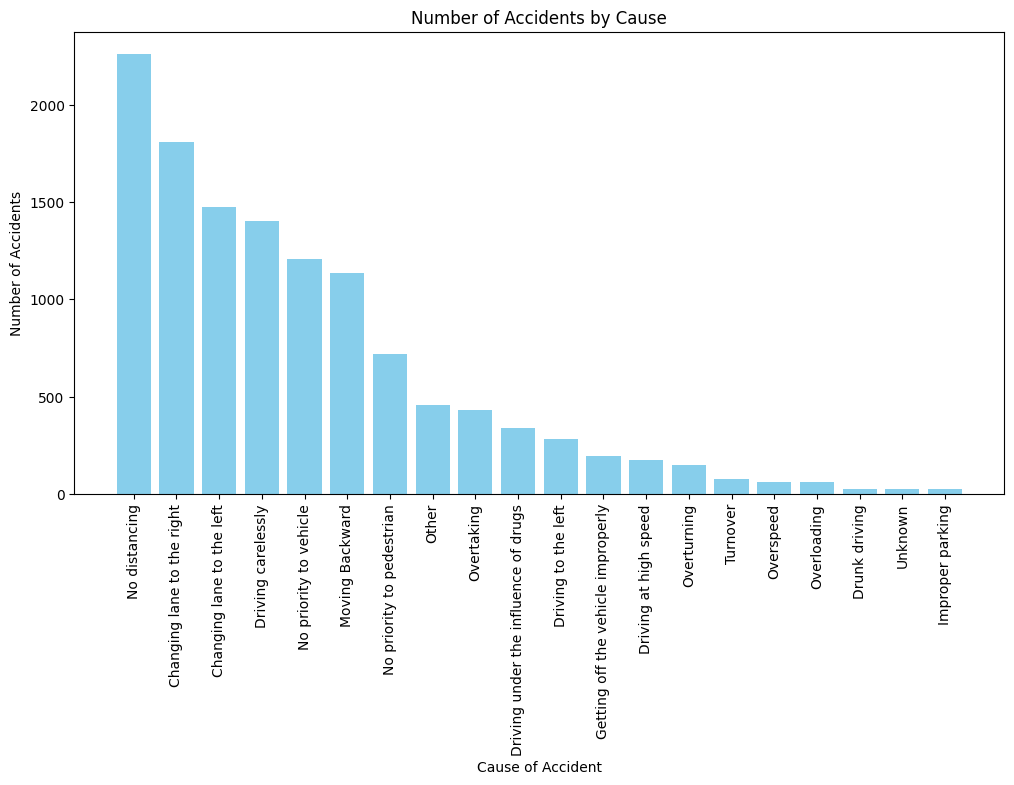

In [46]:
import matplotlib.pyplot as plt

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(result3['Cause_of_accident'], result3['accidents_count'], color='skyblue')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Cause')
plt.xticks(rotation=90)
plt.show()